In [153]:
import tensorflow 
print(tensorflow.__version__)

2.0.0


In [0]:
# importing Datasets module
import tensorflow_datasets as tfds 

In [0]:
imdb,info= tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [0]:
train,test= imdb['train'],imdb['test']

In [0]:
train_sentences=[]
train_label=[]
test_sentences=[]
test_label=[]
for s,l in train:
    train_sentences.append(str(s.numpy()))
    train_label.append(l.numpy())
for s,l in test:
    test_sentences.append(str(s.numpy()))
    test_label.append(l.numpy())    

In [0]:
import numpy as np
train_label=np.array(train_label)
test_label=np.array(test_label)

In [159]:
train_sentences[1]

'b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i\'m sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It\'s a must see and i hope u share my interests"'

In [160]:
print("No of Training Examples: "+str(len(train_sentences)))
print("No of Testing Examples: "+str(len(test_sentences)))

No of Training Examples: 25000
No of Testing Examples: 25000


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Hyperparameters
vocab_size=1000
embedding_dim=16
max_length=120
trunc_type='post'
oov_tok='<00v>'

In [0]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
train_sequences= tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type)
test_sequences= tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=max_length,truncating=trunc_type)

In [163]:
print("train_size: "+str(train_padded.shape))
print("test_size: "+str(test_padded.shape))

train_size: (25000, 120)
test_size: (25000, 120)


In [0]:
import tensorflow as tf
import keras
model=tf.keras.Sequential([ tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=(max_length)),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(6,activation='relu'),
                                  tf.keras.layers.Dense(2,activation='softmax')
                                ])

In [165]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 16,116
Trainable params: 16,116
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [167]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_padded,y_train,epochs=5,validation_data=(test_padded,y_test),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 - 5s - loss: 0.5672 - accuracy: 0.7210 - val_loss: 0.4484 - val_accuracy: 0.7914
Epoch 2/5
25000/25000 - 3s - loss: 0.4205 - accuracy: 0.8070 - val_loss: 0.4150 - val_accuracy: 0.8049
Epoch 3/5
25000/25000 - 3s - loss: 0.4003 - accuracy: 0.8194 - val_loss: 0.4150 - val_accuracy: 0.8067
Epoch 4/5
25000/25000 - 3s - loss: 0.3940 - accuracy: 0.8207 - val_loss: 0.4092 - val_accuracy: 0.8081
Epoch 5/5
25000/25000 - 3s - loss: 0.3917 - accuracy: 0.8258 - val_loss: 0.4098 - val_accuracy: 0.8075


Text(0.5, 1.0, 'Loss Curve')

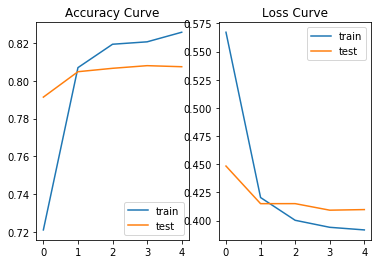

In [168]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.title("Accuracy Curve")
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.title("Loss Curve")

In [0]:
# Evaluating model performance on first 2500 sentences

In [0]:
y_pred_train_prob=[]
y_pred_test_prob=[]
size=range(2500)
for i in size:
    y_pred_train_prob.append(model.predict(train_padded[i].reshape(1,120)))

y_pred_train_prob=np.array(y_pred_train_prob)
y_pred_train_prob=y_pred_train_prob.reshape(2500,2)

In [0]:
for i in size:
    y_pred_test_prob.append(model.predict(test_padded[i].reshape(1,120)))   
y_pred_test_prob=np.array(y_pred_test_prob)
y_pred_test_prob=y_pred_test_prob.reshape(2500,2)    

In [0]:
train_l=train_label[:2500]
test_l=test_label[:2500]


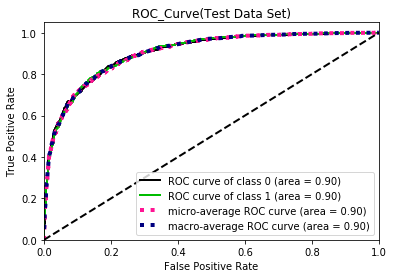

In [181]:
import scikitplot as skplt
skplt.metrics.plot_roc(test_l,y_pred_test_prob,title="ROC_Curve(Test Data Set)")


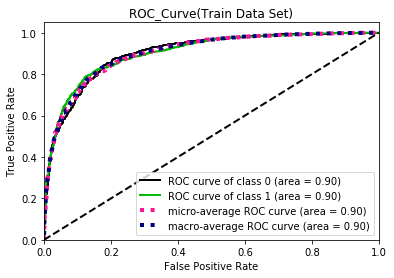

In [182]:
skplt.metrics.plot_roc(train_l,y_pred_train_prob,title="ROC_Curve(Train Data Set)")